In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(34114, 2)

In [22]:
df.head()

,Time,domain
0,2022-04-19 09:51:14,localhost:8888
1,2022-04-19 09:27:10,www.youtube.com
2,2022-04-19 09:27:10,www.youtube.com
3,2022-04-19 09:26:37,localhost:8888
4,2022-04-19 09:25:42,localhost:8888


In [23]:
df.tail()

,Time,domain
34109,2022-02-09 10:15:40,webauth.umbc.edu
34110,2022-02-09 10:15:40,my3.my.umbc.edu
34111,2022-02-09 10:14:19,leads.icicibank.com
34112,2022-02-09 10:11:30,www.google.com
34113,2022-02-09 10:11:30,www.google.com


In [24]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [25]:
df.dropna( inplace=True)

In [26]:
df.dtypes

Time      object
domain    object
dtype: object

In [27]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [28]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [29]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [30]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [31]:
df.head()

,Time,domain
0,2022-04-19 09:51:14,localhost:8888
1,2022-04-19 09:27:10,www.youtube.com
2,2022-04-19 09:27:10,www.youtube.com
3,2022-04-19 09:26:37,localhost:8888
4,2022-04-19 09:25:42,localhost:8888


In [35]:
df['domain'].value_counts()[:50]

www.google.com              10906
blackboard.umbc.edu          2063
github.com                   1864
localhost:8888               1344
lucid.app                     978
www.youtube.com               954
webauth.umbc.edu              819
www.zillow.com                650
docs.google.com               432
umbc-csm.symplicity.com       418
www.linkedin.com              401
my.umbc.edu                   324
www.cars.com                  315
www.facebook.com              306
www.3hradep.com               306
www.amazon.com                291
courses.3rdmil.com            245
accounts.google.com           225
stackoverflow.com             217
mymva.maryland.gov            215
drive.google.com              212
csprd-web.ps.umbc.edu         190
my3.my.umbc.edu               186
scholar.google.com            185
whugesto.net                  165
www.vibeaccount.com           150
secure.bankofamerica.com      147
explore.skillbuilder.aws      135
mail.google.com               128
brxt.mendeley.

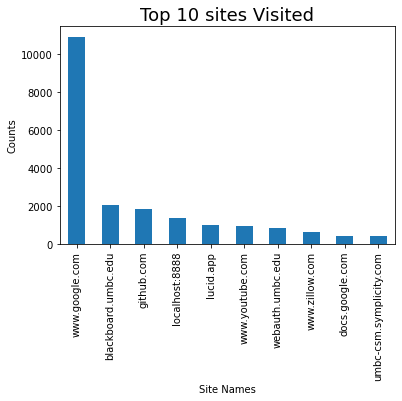

In [153]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 sites Visited', fontdict={'size':18})
plt.xlabel('Site Names')
plt.ylabel('Counts')
plt.show()

In [37]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      909
1      399
5       37
6       45
7      402
8      514
9     1557
10    2718
11    2403
12    1081
13    2045
14    3242
15    1651
16    1880
17    2456
18    2097
19    1101
20    1831
21    2667
22    2953
23    2126
Name: domain, dtype: int64

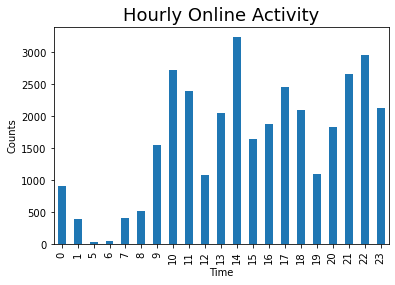

In [152]:
hourly_counts.plot.bar()
plt.title('Hourly Online Activity', fontdict={'size':18})
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()
plt.show()

In [40]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-04-19 09:51:14,localhost:8888,Tuesday,1
1,2022-04-19 09:27:10,www.youtube.com,Tuesday,1
2,2022-04-19 09:27:10,www.youtube.com,Tuesday,1
3,2022-04-19 09:26:37,localhost:8888,Tuesday,1
4,2022-04-19 09:25:42,localhost:8888,Tuesday,1


In [41]:
df['Day'].value_counts()

Monday       7706
Tuesday      5128
Sunday       4720
Thursday     4695
Wednesday    4124
Friday       4070
Saturday     3671
Name: Day, dtype: int64

In [42]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    7706
1    5128
2    4124
3    4695
4    4070
5    3671
6    4720
Name: DayIndex, dtype: int64

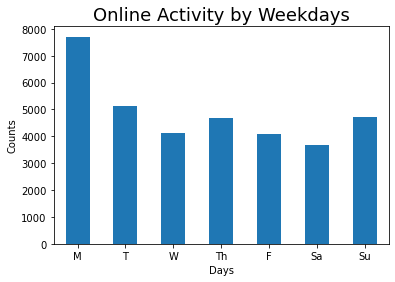

In [151]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)
plt.title('Online Activity by Weekdays', fontdict={'size':18})
plt.xlabel('Days')
plt.ylabel('Counts')
plt.show()
plt.show()

In [44]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-04-19 09:51:14,localhost:8888,Tuesday,1,False
1,2022-04-19 09:27:10,www.youtube.com,Tuesday,1,False
2,2022-04-19 09:27:10,www.youtube.com,Tuesday,1,False
3,2022-04-19 09:26:37,localhost:8888,Tuesday,1,False
4,2022-04-19 09:25:42,localhost:8888,Tuesday,1,False


In [45]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [46]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
355,2022-04-17 23:21:11,umbc-csm.symplicity.com,Sunday,6,True
356,2022-04-17 23:20:58,umbc-csm.symplicity.com,Sunday,6,True
357,2022-04-17 23:20:55,umbc-csm.symplicity.com,Sunday,6,True
358,2022-04-17 23:20:34,umbc-csm.symplicity.com,Sunday,6,True
359,2022-04-17 23:20:14,umbc-csm.symplicity.com,Sunday,6,True


In [47]:
weekday['domain'].value_counts()[:5]

www.google.com         7786
github.com             1803
blackboard.umbc.edu    1424
localhost:8888         1172
lucid.app               934
Name: domain, dtype: int64

In [48]:
weekend['domain'].value_counts()[:5]

www.google.com         3120
blackboard.umbc.edu     639
www.amazon.com          243
www.youtube.com         236
courses.3rdmil.com      204
Name: domain, dtype: int64

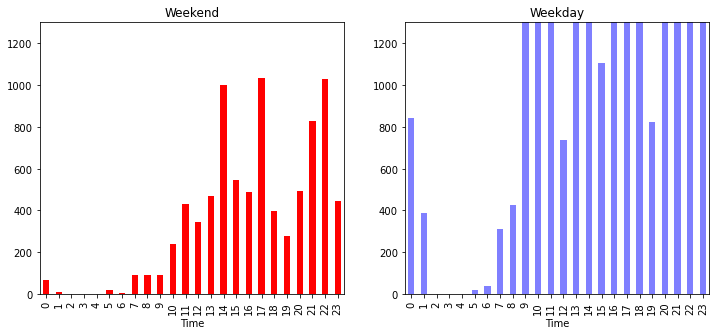

In [51]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [ ]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

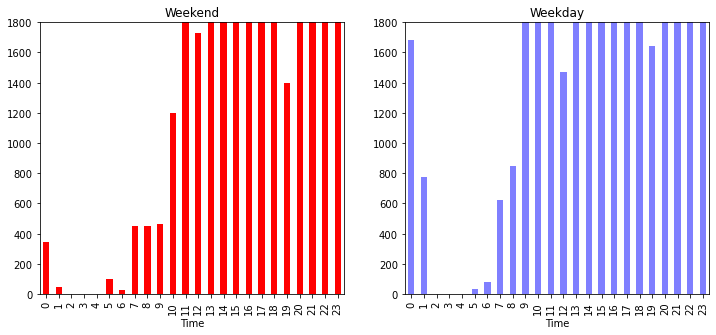

In [149]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)


plt.show()

In [53]:
df['domain'].value_counts()[:10]

www.google.com             10906
blackboard.umbc.edu         2063
github.com                  1864
localhost:8888              1344
lucid.app                    978
www.youtube.com              954
webauth.umbc.edu             819
www.zillow.com               650
docs.google.com              432
umbc-csm.symplicity.com      418
Name: domain, dtype: int64

In [72]:
def get_data_for_domain(val,data):
    df=data
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [78]:
def show_domain_stats(domain,df, color='blue', alpha=1):
    data = get_data_for_domain(domain,df)
    show_stats(data, color, alpha)
    return data

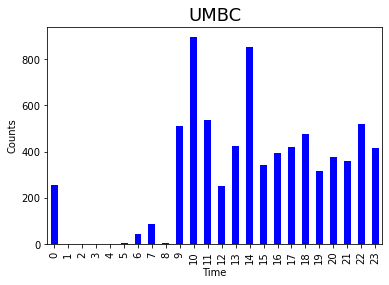

In [144]:
_= show_domain_stats('umbc',df)
plt.title('UMBC', fontdict={'size':18})
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()

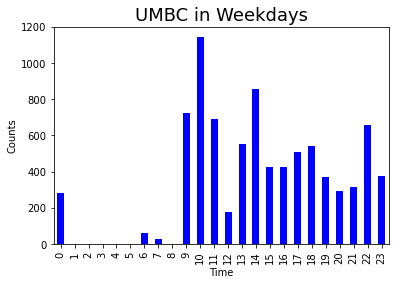

In [143]:
_= show_domain_stats('umbc',weekday)

plt.title('UMBC in Weekdays', fontdict={'size':18})
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()

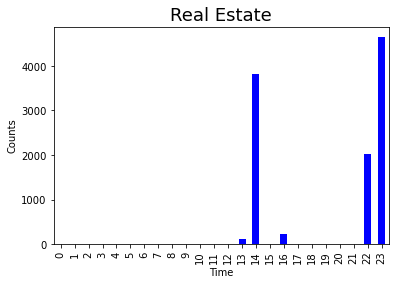

In [141]:
_= show_domain_stats('redfin|zillow|homesnap',df, 'blue')
plt.title('Real Estate', fontdict={'size':18})
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()

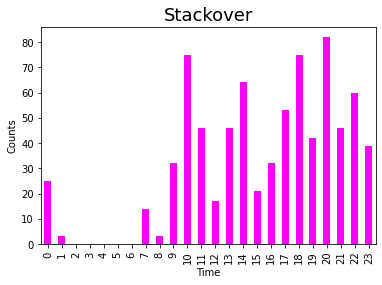

In [140]:
_ = show_domain_stats('stackover',df, 'magenta')
plt.title('Stackover', fontdict={'size':18})
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()


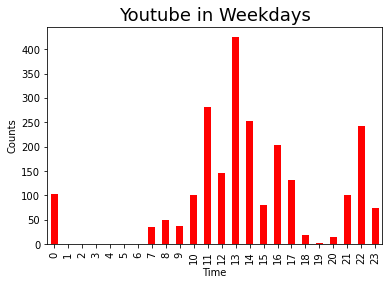

In [139]:
_ = show_domain_stats('youtube', weekday,'red')
plt.title('Youtube in Weekdays', fontdict={'size':18})
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()

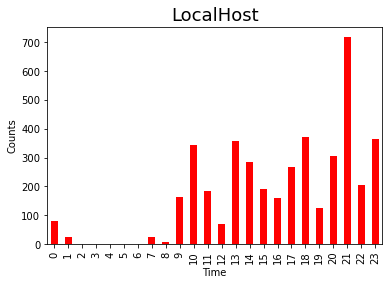

In [138]:
_ = show_domain_stats('localhost',df, 'red')

plt.title('LocalHost', fontdict={'size':18})
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()

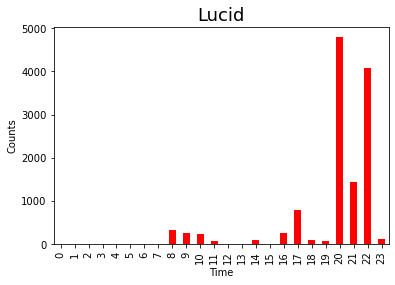

In [137]:
_ = show_domain_stats('lucid',df, 'red')
plt.title('Lucid', fontdict={'size':18})
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()

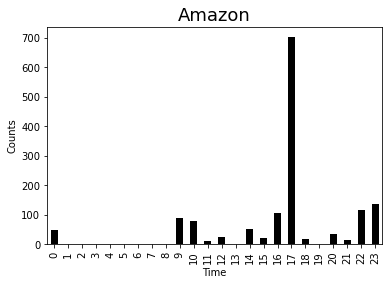

In [135]:
_=show_domain_stats('amazon',df,'black')

plt.title('Amazon', fontdict={'size':18})
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()

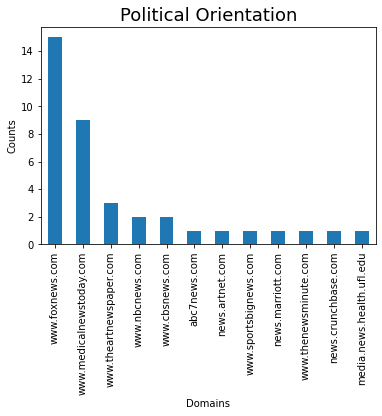

In [113]:
df[df['domain'].str.contains('news')]['domain'].value_counts().plot(kind='bar')
plt.title('Political Orientation', fontdict={'size':18})
plt.xlabel('Domains')
plt.ylabel('Counts')
plt.show()

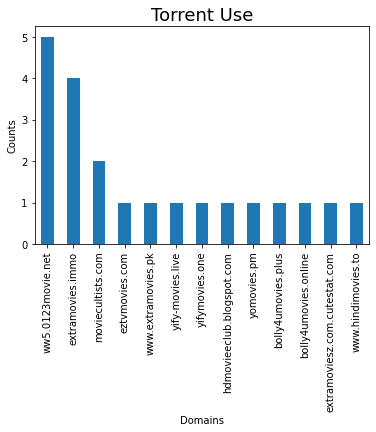

In [112]:
df[df['domain'].str.contains('movie')]['domain'].value_counts().plot(kind='bar')
plt.title('Torrent Use', fontdict={'size':18})
plt.xlabel('Domains')
plt.ylabel('Counts')
plt.show()

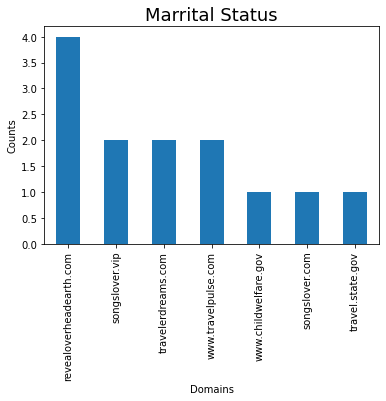

In [116]:
df[df['domain'].str.contains('wife|kids|child|love|anniversary|gift|valentine|honeymoon|travel')]['domain'].value_counts().plot(kind='bar')
plt.title('Marrital Status', fontdict={'size':18})
plt.xlabel('Domains')
plt.ylabel('Counts')
plt.show()

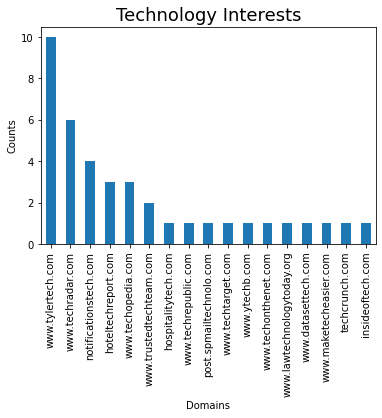

In [121]:
df[df['domain'].str.contains('tech')]['domain'].value_counts().plot(kind='bar')
plt.title('Technology Interests', fontdict={'size':18})
plt.xlabel('Domains')
plt.ylabel('Counts')
plt.show()

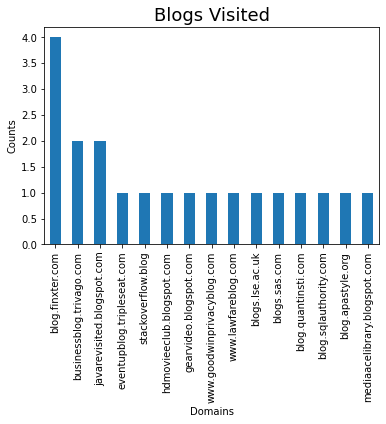

In [125]:
df[df['domain'].str.contains('blog')]['domain'].value_counts().plot(kind='bar')
plt.title('Blogs Visited', fontdict={'size':18})
plt.xlabel('Domains')
plt.ylabel('Counts')
plt.show()

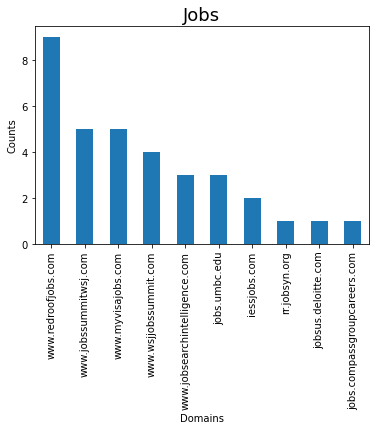

In [134]:
df[df['domain'].str.contains('jobs|positions')]['domain'].value_counts().plot(kind='bar')
plt.title('Jobs', fontdict={'size':18})
plt.xlabel('Domains')
plt.ylabel('Counts')
plt.show()

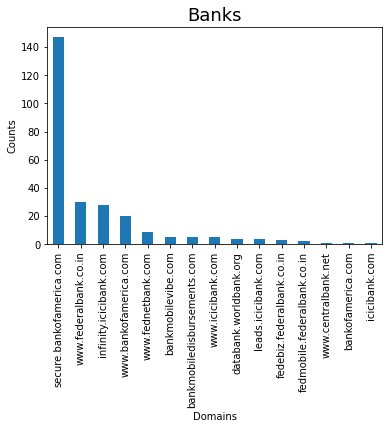

In [156]:
df[df['domain'].str.contains('bank')]['domain'].value_counts().plot(kind='bar')
plt.title('Banks', fontdict={'size':18})
plt.xlabel('Domains')
plt.ylabel('Counts')
plt.show()

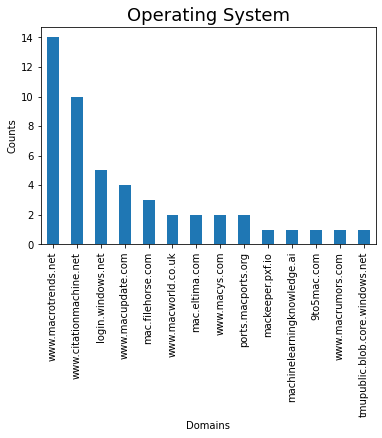

In [157]:
df[df['domain'].str.contains('mac|windows')]['domain'].value_counts().plot(kind='bar')
plt.title('Operating System', fontdict={'size':18})
plt.xlabel('Domains')
plt.ylabel('Counts')
plt.show()

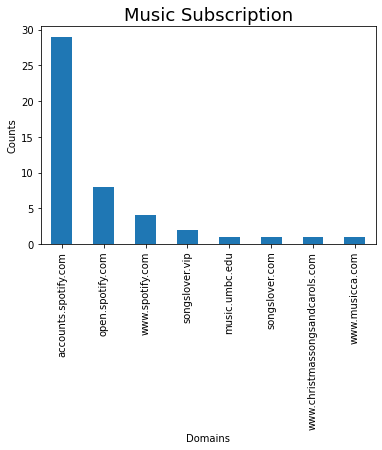

In [162]:
df[df['domain'].str.contains('music|songs|saavan|spotify')]['domain'].value_counts().plot(kind='bar')
plt.title('Music Subscription', fontdict={'size':18})
plt.xlabel('Domains')
plt.ylabel('Counts')
plt.show()

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1. Seems to be a personal computer as it includes searches at odd hours like 11pm-12am.

2. He is a student for sure as the history has umbc.edu websites. His online activity is regular            throughout the day excluding night sleeping time from 12am-5am. It seems his activity is same in          weekdays and weekends. Additionally, he is using umbc website at 10am in weekdays and youtube at 2pm      which tells that he definitely not employed.

3. He seems interested in 
        a) programming(visiting github, stakeoverflow, w3school)
        b) real-estate(visiting zillow regularly)
        c) likes to go outside(as checks weather regularly) 
        d) music(visits pagalnew-song downloading website)
        e) research work (as visits citation sites like google scholar, elsevier, statista, mendeley)
        f) finance/stocks (as visits yahoo finance regularly)
        g) shopping (visits amazon often)
        h) maybe interested in facebook (the level cannot be predicted as we dont know the time of using            a particular website)
        
4. Interesting findings:
        a) visiting lucid.app related to databases, maybe he is studying something related to database              management or data science. He has visited blogs related to programming. So definitely a                  student from computer science domain. 
        b) localhost 8888 is seen frequently which means apache2 web server, he might be working on                  server based application like mysql, jupyter notebook, rest,etc. 
        c) Has visited 3hradep.com means drug & alcohol test for getting driving license, he might be in            proedure to get driving license or got it recently. He can be a good target for car insurance            comapnies as we can notice he has visited cars.com too.
        d) He is using aws skillbuilder website often, suggesting that he might be interested in aws                certification or getting a job in Amazon, or planning to use AWS services in future which                confirms that he would work with data in future.
        e) he may be interested in Hotel/Motel technology as he has multiple-domain searches related to              hospitality/hotel tech.
        f) He visited indian banks website like icici bank, federal bank, etc. He may be an indian                  student came as an international student at UMBC on F1 Visa, or has ties with India or money              invested/saved in Indian Market.
        g) Using mac system as most searches are mac instead of windows. He may prefer apple products,              should market apple products or premium branded products to him.
        h) He may be using spotify service, can be advertised for podcasts too, as he is more likely to              buy that subscription if he already has spotify. Music subscription ads may not work as he has            already selected spotify. It can be a useful information for negative marketing by spotify                competitors if spotify faces any glitched in future.
        
5. Miscelleneous Personality Conclusions:
        a) He is studying in UMBC university, probably living near by baltimore
        b) he is active in 5am in the morning, suggests he might be an early-bird.
        c) Looks like his eating habits are regular at 12pm and 7pm with least online presence during                that time.
        d) Maximum online presence at Mondays and least at saturdays makes sense as students enjoy on                weekend nights.
        e) He is dependent on google searches for day-to-day tasks which means either he is curious to              know things or he is addicted to google everything.
        f) Linkdin activity is high which shows he may be looking for jobs in a competetive market or                making professional connections for future. Plus he has visited many other jobs website                  including umbc, compass website which indicates he might be a part-time job candidate.
        g) Has a single bank of america account, so he may be trusting on classics when dealing with                money.
        h) follows multiple news outlets but majorly fox news, his politcal interests may be aligned with            The Repulican party.
        i) he is using torrent that indicates he may not be paying for paid softwares and instead using              crack versions. So targeting him for paid software subscription services may not work.
        j) He may not be married as there is no single search for wiffe, gifts, anniversary, kids, etc.              So he can be targetted with dating/marraige websites.
        